# 01 – Eksplorasi Dataset SIMPLIcity

Tujuan:
- Memastikan struktur direktori dataset sudah sesuai (`train/`, `validation/`, `test/`).
- Melihat jumlah gambar per split.
- Mendefinisikan aturan labeling dari nama file.
- Melihat contoh gambar dan distribusi kelas sebagai dasar pemahaman data.


In [4]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [5]:
import sys
import pathlib

# Asumsi: notebook berada di folder "notebooks"
PROJECT_ROOT = pathlib.Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from src import config  # gunakan konfigurasi path & parameter dari config.py

print("Project root :", PROJECT_ROOT)
print("Data root    :", config.DATA_ROOT)


Project root : /home/tumanggors/github/neuralcomp/simplicity_cnn
Data root    : /home/tumanggors/github/neuralcomp/simplicity_cnn/data/SIMPLIcity


In [6]:
print("Isi direktori data/SIMPLIcity:")
for split_dir in [config.TRAIN_DIR, config.VAL_DIR, config.TEST_DIR]:
    print(f"- {split_dir.name}:")
    if split_dir.exists():
        for p in sorted(split_dir.iterdir())[:5]:
            print("   ", p.name)
        print("   ...")
    else:
        print("   (TIDAK ADA)")


Isi direktori data/SIMPLIcity:
- train:
    0.jpg
    1.jpg
    10.jpg
    100.jpg
    101.jpg
   ...
- validation:
    150.jpg
    151.jpg
    152.jpg
    153.jpg
    154.jpg
   ...
- test:
    180.jpg
    181.jpg
    182.jpg
    183.jpg
    184.jpg
   ...


In [7]:
def count_images_in_dir(dir_path: Path):
    exts = (".jpg", ".jpeg", ".png", ".JPG", ".JPEG", ".PNG")
    return sum(1 for p in dir_path.iterdir() if p.suffix in exts)

data = {
    "split": [],
    "num_images": [],
}

for split_name, split_dir in [
    ("train", config.TRAIN_DIR),
    ("validation", config.VAL_DIR),
    ("test", config.TEST_DIR),
]:
    data["split"].append(split_name)
    data["num_images"].append(count_images_in_dir(split_dir))

df_counts = pd.DataFrame(data)
df_counts


,split,num_images
0,train,500
1,validation,300
2,test,200


In [17]:
import matplotlib.image as mpimg

try:
    from src import config
except ImportError:
    print("Gagal import 'src.config'. Pastikan notebook ada di root project.")
    # Fallback path jika import gagal (sesuaikan jika perlu)
    class Config:
        TRAIN_DIR = Path("data/SIMPLIcity/train")
    config = Config()


In [18]:

# ------------------------------------------------------------------
# Fungsi Helper (dari kode Anda + tambahan)
# ------------------------------------------------------------------

def filename_to_index(filename: str) -> int:
    """ '123.jpg' -> 123 """
    stem = Path(filename).stem  # '123'
    return int(stem)


def index_to_class_id(index: int) -> int:
    """ 123 -> 1 (karena 100-199) """
    return index // 100


def filename_to_class_id(filename: str) -> int:
    """ '123.jpg' -> 1 """
    return index_to_class_id(filename_to_index(filename))


def class_id_to_name(class_id: int) -> str:
    """ 1 -> 'Beach' """
    if 0 <= class_id < len(CLASS_NAMES):
        return CLASS_NAMES[class_id]
    return "Unknown"

In [19]:
# ------------------------------------------------------------------
# Daftar Nama Kategori (sesuai gambar dataset)
# ------------------------------------------------------------------
CLASS_NAMES = [
    "People",     # 0
    "Beach",      # 1
    "Building",   # 2
    "Bus",        # 3
    "Dinosaur",   # 4
    "Elephant",   # 5
    "Flower",     # 6
    "Horse",      # 7
    "Mountain",   # 8
    "Food",       # 9
]

Mengambil gambar dari base path: /home/tumanggors/github/neuralcomp/simplicity_cnn/data/SIMPLIcity/train


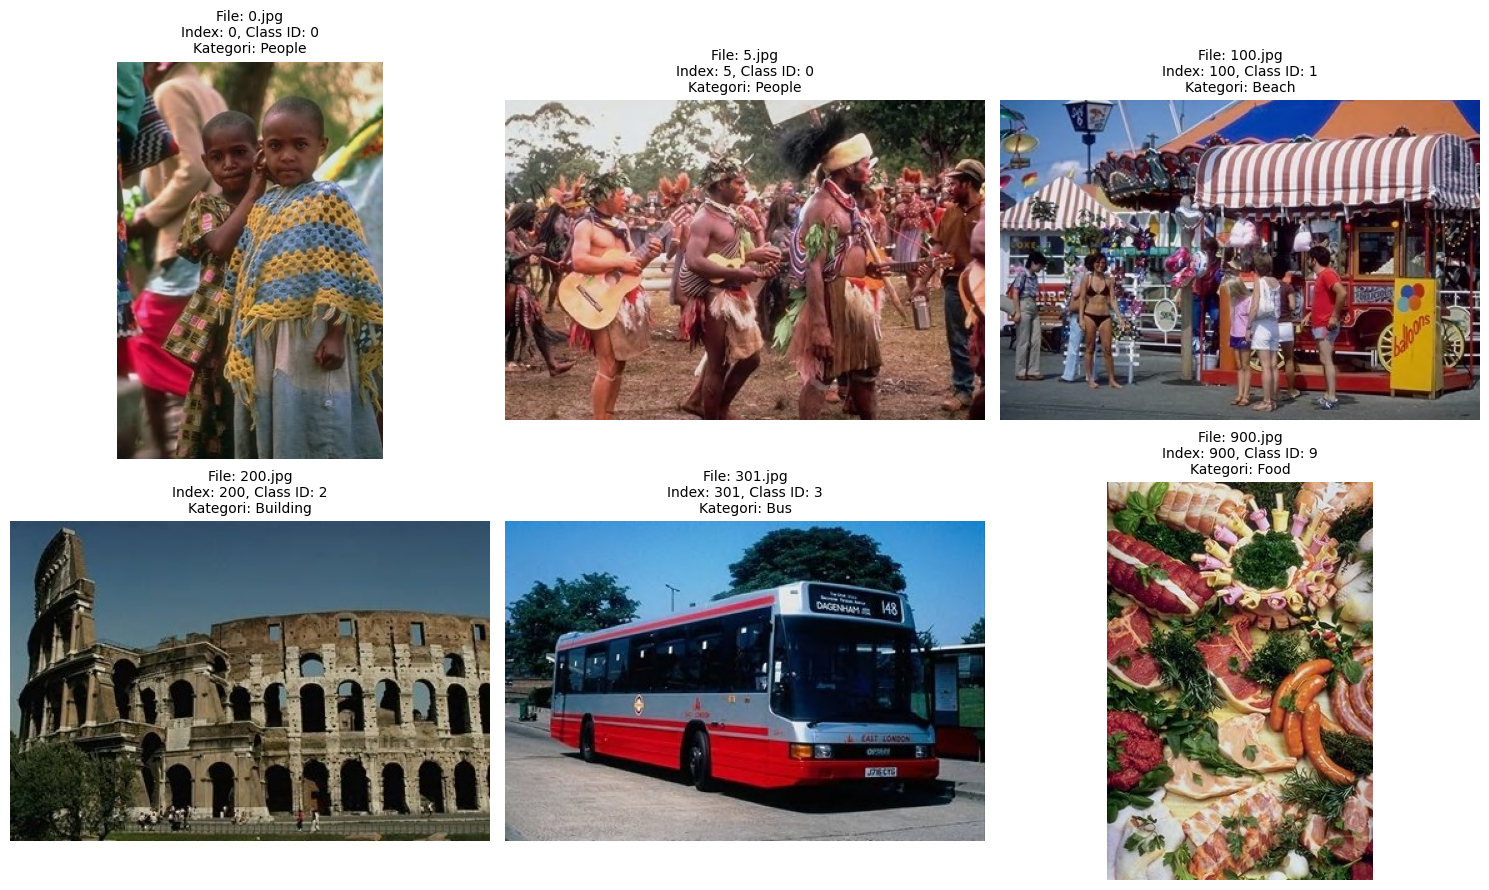

In [20]:
# ------------------------------------------------------------------
# Visualisasi
# ------------------------------------------------------------------

examples = ["0.jpg", "5.jpg", "100.jpg", "200.jpg", "301.jpg", "900.jpg"]
image_base_dir = Path(config.TRAIN_DIR) # Asumsi gambar ada di folder train

# Buat grid plot 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten() # Ubah jadi array 1D agar mudah di-loop

print(f"Mengambil gambar dari base path: {image_base_dir}")

for i, fname in enumerate(examples):
    ax = axes[i]
    
    # --- 1. Dapatkan semua info ---
    idx = filename_to_index(fname)
    cid = filename_to_class_id(fname)
    cname = class_id_to_name(cid) # Ini bagian categorical
    
    # --- 2. Tampilkan gambar ---
    img_path = image_base_dir / fname
    
    if img_path.exists():
        img = mpimg.imread(img_path)
        ax.imshow(img)
    else:
        ax.text(0.5, 0.5, f"Gambar tidak\nditemukan:\n{fname}", 
                ha='center', va='center', color='red', fontsize=10)
    
    # --- 3. Set title dengan semua info ---
    title = f"File: {fname}\n"
    title += f"Index: {idx}, Class ID: {cid}\n"
    title += f"Kategori: {cname}"
    
    ax.set_title(title, fontsize=10)
    ax.axis("off") # Sembunyikan sumbu x/y

plt.tight_layout()
plt.show()